In [1]:
from keras.layers import SimpleRNN, Embedding
from keras.models import Sequential

/home/sainath/code/nlp-tutorials-notes/.env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


Like all recurrent layers in Keras, SimpleRNN can be run in two different modes: it can return either the full sequences of successive outputs for each timestep (a 3D tensor of shape (batch_size, timesteps, output_features)), or it can return only the last output for each input sequence (a 2D tensor of shape (batch_size, output_features)).

In [3]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences = True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [4]:
# stacking
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


# Simple RNN - IMDB

In [5]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [6]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    verbose = 2,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
 - 40s - loss: 0.6382 - acc: 0.6177 - val_loss: 0.4692 - val_acc: 0.8000
Epoch 2/10
 - 33s - loss: 0.4191 - acc: 0.8192 - val_loss: 0.5867 - val_acc: 0.7332
Epoch 3/10
 - 33s - loss: 0.3817 - acc: 0.8398 - val_loss: 0.3699 - val_acc: 0.8440
Epoch 4/10
 - 33s - loss: 0.2588 - acc: 0.8991 - val_loss: 0.3618 - val_acc: 0.8508
Epoch 5/10
 - 33s - loss: 0.1991 - acc: 0.9254 - val_loss: 0.3910 - val_acc: 0.8370
Epoch 6/10
 - 33s - loss: 0.1506 - acc: 0.9455 - val_loss: 0.3885 - val_acc: 0.8540
Epoch 7/10
 - 33s - loss: 0.0992 - acc: 0.9670 - val_loss: 0.4736 - val_acc: 0.8214
Epoch 8/10
 - 33s - loss: 0.0606 - acc: 0.9808 - val_loss: 0.5895 - val_acc: 0.7874
Epoch 9/10
 - 33s - loss: 0.0369 - acc: 0.9896 - val_loss: 0.6982 - val_acc: 0.7882
Epoch 10/10
 - 33s - loss: 0.0272 - acc: 0.9919 - val_loss: 0.6176 - val_acc: 0.8190


In [7]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

# A concrete LSTM example in Keras

In [8]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    verbose = 2,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
 - 165s - loss: 0.5075 - acc: 0.7627 - val_loss: 0.3477 - val_acc: 0.8590
Epoch 2/10
 - 163s - loss: 0.2918 - acc: 0.8851 - val_loss: 0.4465 - val_acc: 0.7804
Epoch 3/10
 - 163s - loss: 0.2339 - acc: 0.9109 - val_loss: 0.2780 - val_acc: 0.8910
Epoch 4/10
 - 164s - loss: 0.1956 - acc: 0.9272 - val_loss: 0.3074 - val_acc: 0.8656
Epoch 5/10
 - 165s - loss: 0.1736 - acc: 0.9364 - val_loss: 0.3186 - val_acc: 0.8828
Epoch 6/10
 - 163s - loss: 0.1553 - acc: 0.9433 - val_loss: 0.3563 - val_acc: 0.8848
Epoch 7/10
 - 163s - loss: 0.1371 - acc: 0.9511 - val_loss: 0.4556 - val_acc: 0.8708
Epoch 8/10
 - 164s - loss: 0.1341 - acc: 0.9525 - val_loss: 0.3237 - val_acc: 0.8796
Epoch 9/10
 - 164s - loss: 0.1180 - acc: 0.9587 - val_loss: 0.3387 - val_acc: 0.8738
Epoch 10/10
 - 163s - loss: 0.1086 - acc: 0.9627 - val_loss: 0.4384 - val_acc: 0.8694


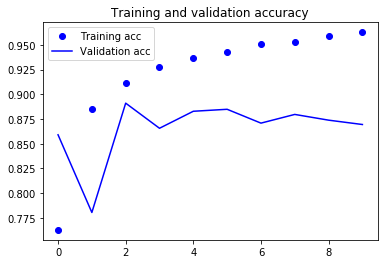

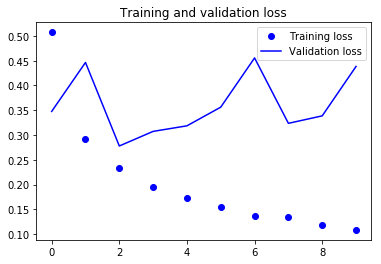

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()